<a href="https://colab.research.google.com/github/DHub6/UAS_DATAMINING/blob/main/201220092_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load dataset
from google.colab import files
uploaded = files.upload()

Saving Bank Customer Churn Dataset.csv to Bank Customer Churn Dataset.csv


In [2]:
#import library penting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import io
data = pd.read_csv(io.BytesIO(uploaded['Bank Customer Churn Dataset.csv']))
print(data)

%matplotlib inline

      customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0         

In [3]:
# import semua libraries dan dependensi untuk visualisasi data
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker


In [4]:
# mengimpor semua library dan dependensi untuk machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [5]:
#Langkah 1: Membaca dan Memahami Data
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,15647311,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,15619304,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,15701354,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,15737888,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
data.empty

False

In [8]:
data.shape

(10000, 12)

In [9]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0000,15690940.5694,71936.1861,15565701.0000,15628528.2500,15690738.0000,15753233.7500,15815690.0000
credit_score,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
products_number,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
credit_card,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
active_member,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
estimated_salary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800
churn,10000.0000,0.2037,0.4028,0.0000,0.0000,0.0000,0.0000,1.0000


In [11]:
#Langkah 2: Membersihkan Data
data = data.drop(['customer_id'], axis = 1)

In [12]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


In [13]:
# Memeriksa nilai yang hilang
data.isna().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [14]:
# Pemisahan Variabel/Kolom Numerik dan Kategorik

cat_col = data.select_dtypes(include=['object']).columns
num_col = data.select_dtypes(exclude=['object']).columns
data_cat = data[cat_col]
data_num = data[num_col]

In [15]:
#Langkah 3: Memvisualisasikan Data
# Persentase customer yang berpindah atau bertahan di bank
total_customers = len(data)
churned_count = data[data['churn'] == 1]['churn'].count()
not_churned_count = data[data['churn'] == 0]['churn'].count()
percentage_churned = (churned_count / total_customers) * 100
percentage_not_churned = (not_churned_count / total_customers) * 100

print(f"Percentage of customers who churned: {percentage_churned:.2f}%")
print(f"Percentage of customers who did not churn: {percentage_not_churned:.2f}%")

Percentage of customers who churned: 20.37%
Percentage of customers who did not churn: 79.63%


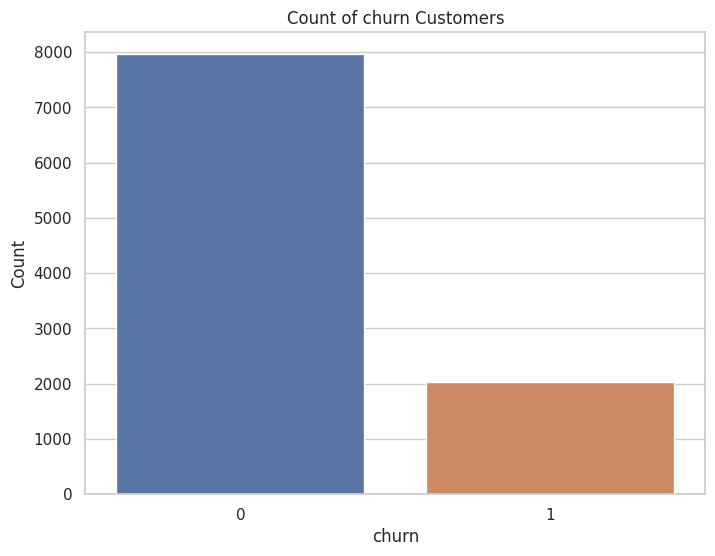

In [16]:
sns.set(style="whitegrid")

# Memplot plot batang untuk kolom 'churn'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='churn')
plt.title('Count of churn Customers')
plt.xlabel('churn')
plt.ylabel('Count')
plt.show()

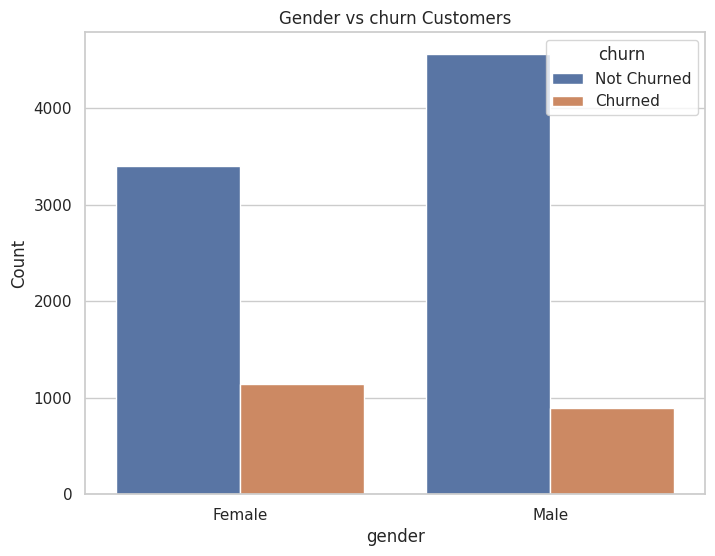

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender', hue='churn')
plt.title('Gender vs churn Customers')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

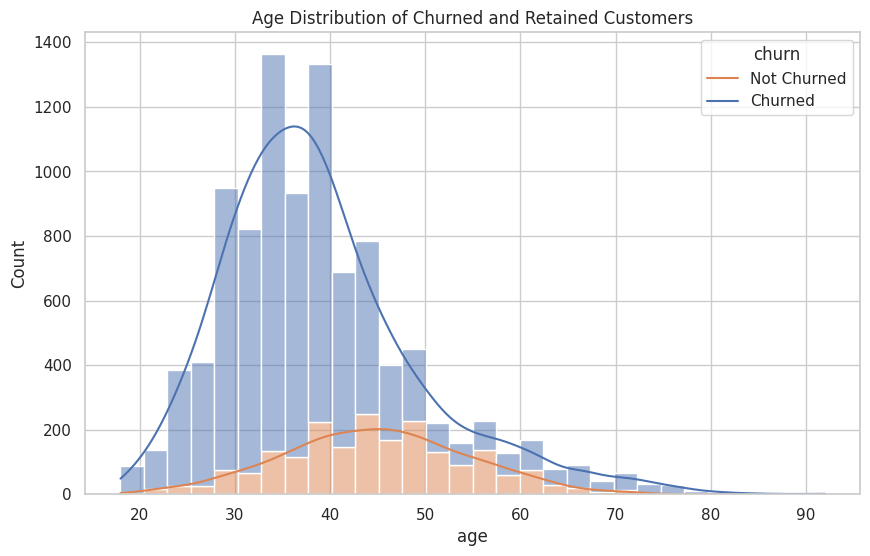

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x='age', hue='churn', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution of Churned and Retained Customers')
plt.xlabel('age')
plt.ylabel('Count')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

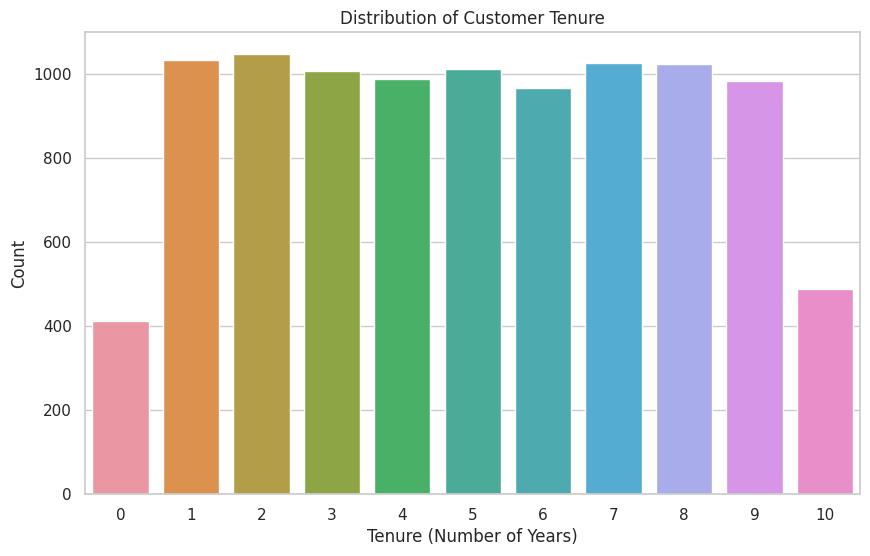

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='tenure')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Number of Years)')
plt.ylabel('Count')
plt.show()

In [20]:
data['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

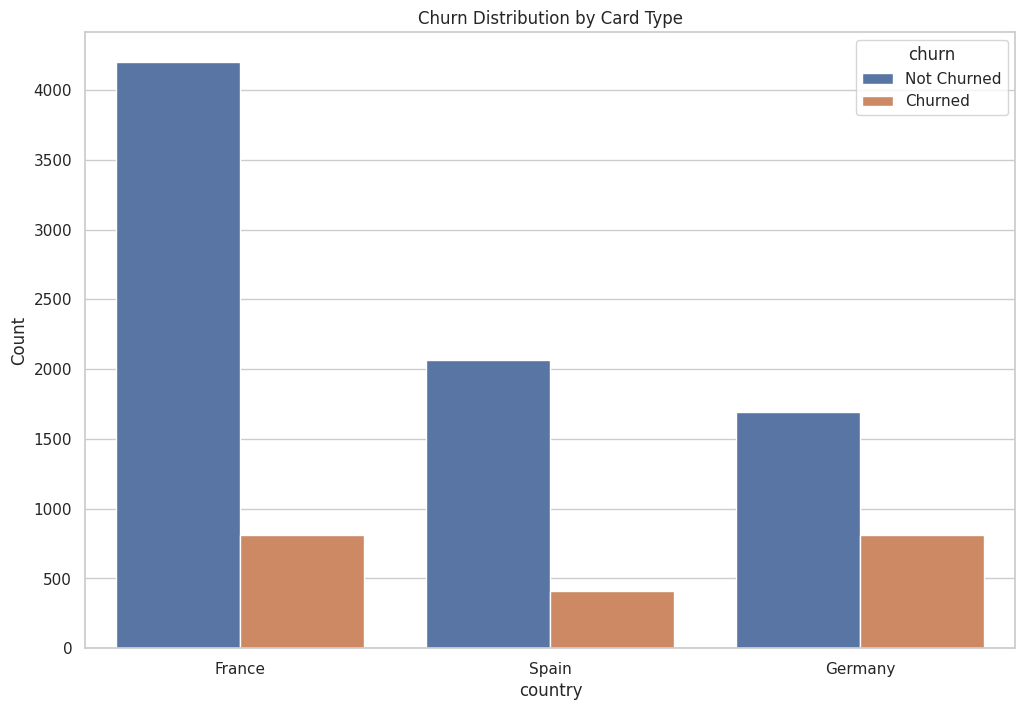

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='country', hue='churn', order=['France', 'Spain', 'Germany'])
plt.title('Churn Distribution by Card Type')
plt.xlabel('country')
plt.ylabel('Count')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

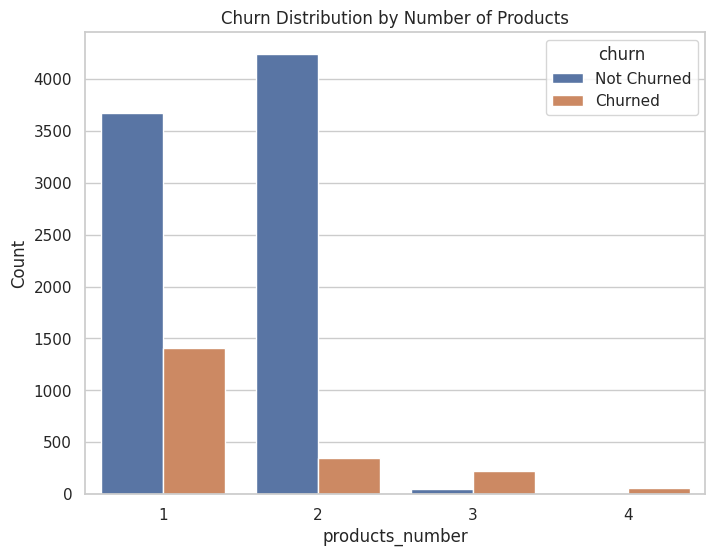

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='products_number', hue='churn')
plt.title('Churn Distribution by Number of Products')
plt.xlabel('products_number')
plt.ylabel('Count')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

In [23]:
# Menghitung persentase churn berdasarkan jumlah produk
churn_percentage_by_product_count = data.groupby('products_number')['churn'].mean() * 100

# Menampilkan persentase churn berdasarkan jumlah produk
print("Churn Percentage by Number of Products:")
print(churn_percentage_by_product_count)

Churn Percentage by Number of Products:
products_number
1    27.7144
2     7.5817
3    82.7068
4   100.0000
Name: churn, dtype: float64


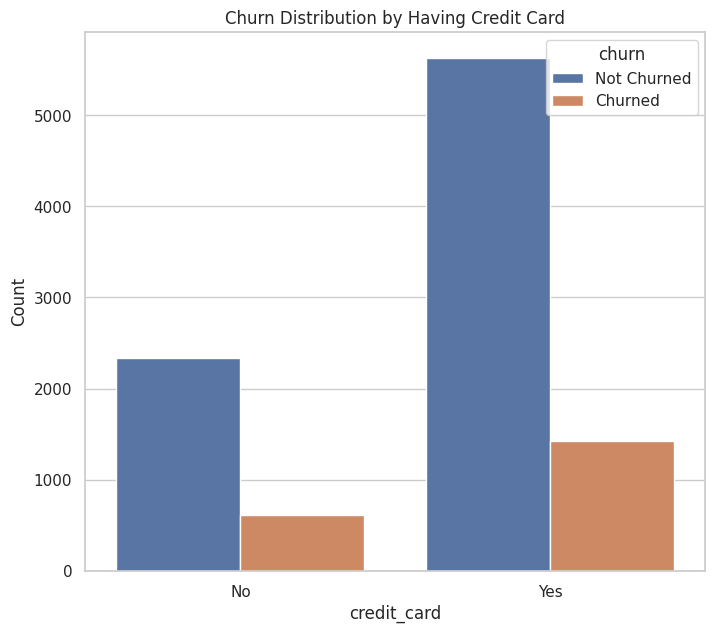

In [24]:
plt.figure(figsize=(8, 7))
sns.countplot(data=data, x='credit_card', hue='churn')
plt.title('Churn Distribution by Having Credit Card')
plt.xlabel('credit_card')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Set x-axis labels as 'No' and 'Yes'
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

In [25]:
# Menghitung persentase churn dengan jumlah credit card
churn_percentage_by_card = data.groupby('credit_card')['churn'].mean() * 100

# Menampilkan persentase churn berdasarkan jumlah credit card
print("Churn Percentage by Having Credit Card:")
print(churn_percentage_by_card)

Churn Percentage by Having Credit Card:
credit_card
0   20.8149
1   20.1843
Name: churn, dtype: float64


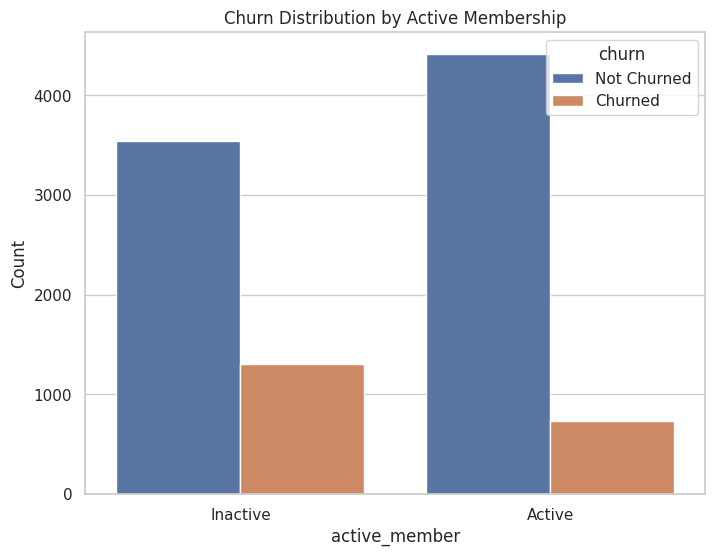

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='active_member', hue='churn')
plt.title('Churn Distribution by Active Membership')
plt.xlabel('active_member')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])  # Set x-axis labels
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

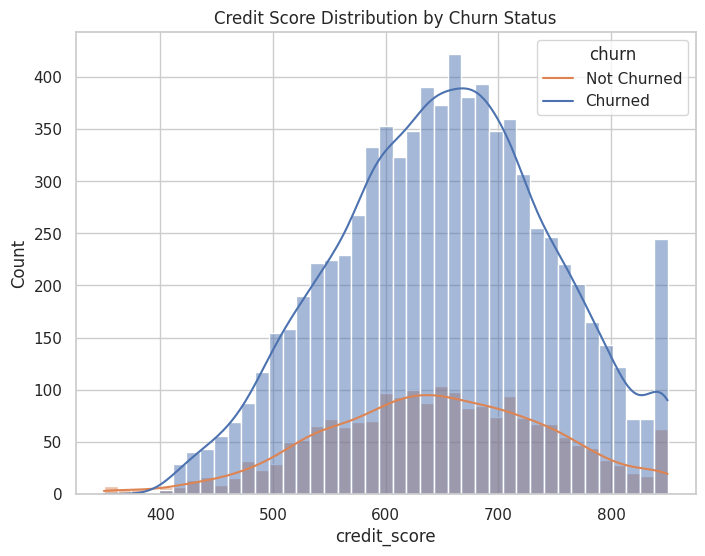

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(data, x='credit_score', hue='churn', kde=True)
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('credit_score')
plt.ylabel('Count')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

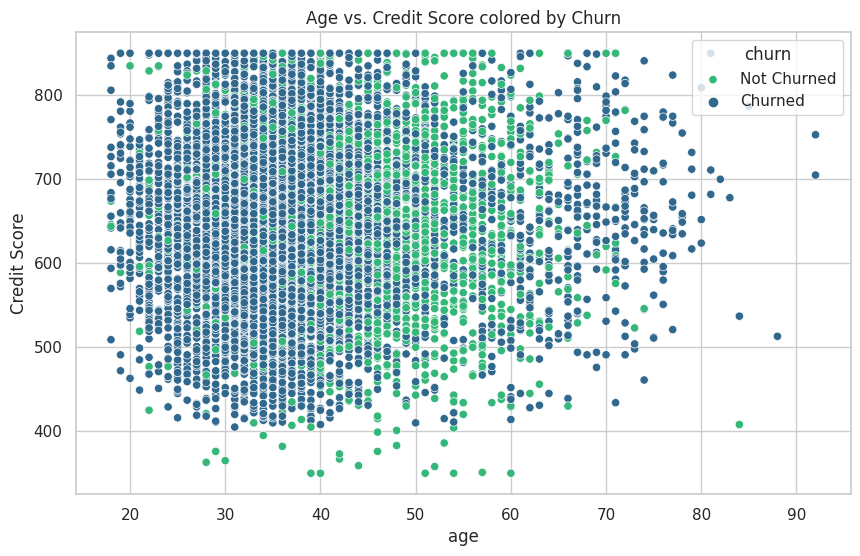

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='credit_score', hue='churn', palette='viridis')
plt.title('Age vs. Credit Score colored by Churn')
plt.xlabel('age')
plt.ylabel('Credit Score')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

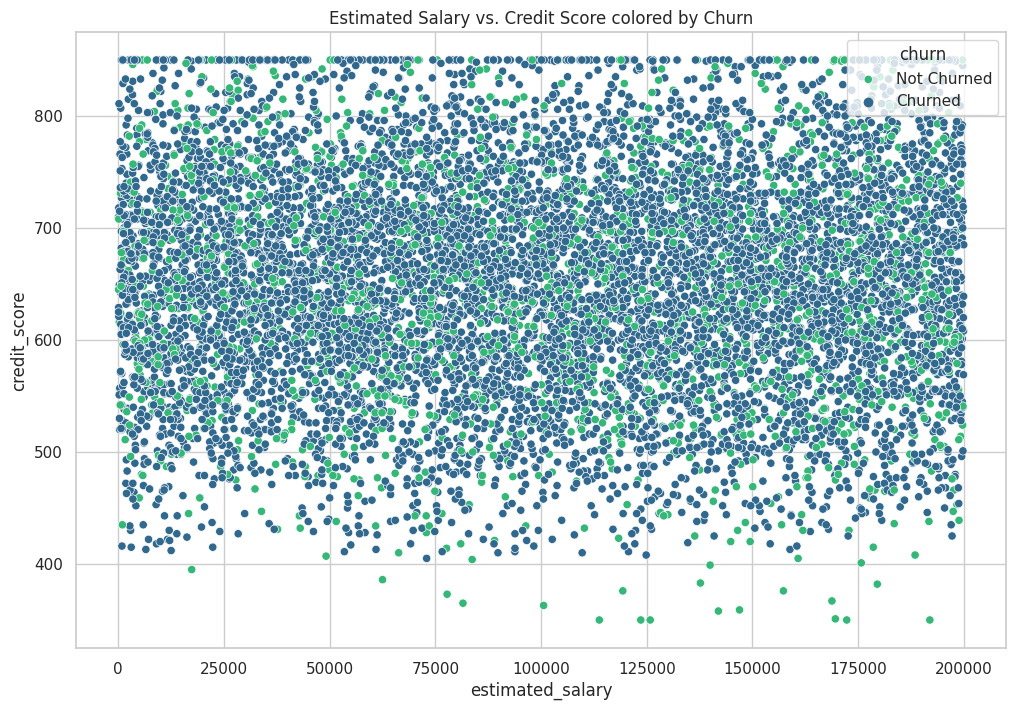

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='estimated_salary', y='credit_score', hue='churn', palette='viridis')
plt.title('Estimated Salary vs. Credit Score colored by Churn')
plt.xlabel('estimated_salary')
plt.ylabel('credit_score')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

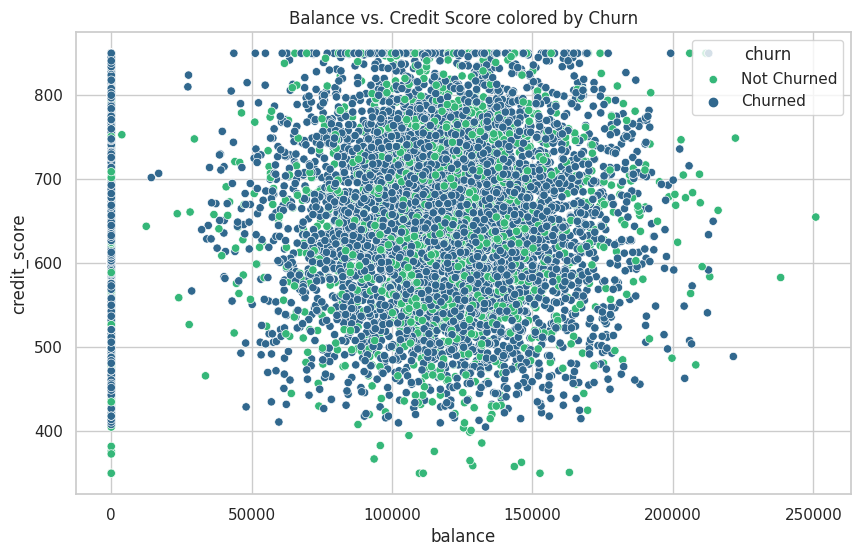

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='balance', y='credit_score', hue='churn', palette='viridis')
plt.title('Balance vs. Credit Score colored by Churn')
plt.xlabel('balance')
plt.ylabel('credit_score')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

In [31]:
#Langkah 4: Persiapan Data
cat_col

Index(['country', 'gender'], dtype='object')

In [32]:
# Dapatkan variabel dummy untuk fitur kategorikal dan simpan dalam variabel baru - 'dummies'

dummies = pd.get_dummies(data[cat_col], drop_first = True)
dummies.shape

(10000, 3)

In [33]:
# Menambahkan hasil ke bingkai data asli
data = pd.concat([data, dummies], axis = 1)

In [34]:
# Hapus variabel cat asli karena dummies sudah dibuat

data.drop(cat_col, axis = 1, inplace = True)
data.shape

(10000, 12)

In [35]:
data.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.0000,1,1,1,101348.8800,1,0,0,0
1,608,41,1,83807.8600,1,0,1,112542.5800,0,0,1,0
2,502,42,8,159660.8000,3,1,0,113931.5700,1,0,0,0
3,699,39,1,0.0000,2,0,0,93826.6300,0,0,0,0
4,850,43,2,125510.8200,1,1,1,79084.1000,0,0,1,0


In [36]:
# Mengubah Penskalaan Fitur
from sklearn.preprocessing import StandardScaler

num_columns_list = num_col.tolist()
num_columns_list.remove("churn")
num_col = pd.Index(num_columns_list)
numerical_columns = num_col

scaler = StandardScaler()
scaler.fit(data[numerical_columns])
data[numerical_columns] = scaler.transform(data[numerical_columns])

In [37]:
data.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,-0.3262,0.2935,-1.0418,-1.2258,-0.9116,0.6461,0.9702,0.0219,1,0,0,0
1,-0.4400,0.1982,-1.3875,0.1174,-0.9116,-1.5478,0.9702,0.2165,0,0,1,0
2,-1.5368,0.2935,1.0329,1.3331,2.5271,0.6461,-1.0307,0.2407,1,0,0,0
3,0.5015,0.0075,-1.3875,-1.2258,0.8077,-1.5478,-1.0307,-0.1089,0,0,0,0
4,2.0639,0.3889,-1.0418,0.7857,-0.9116,0.6461,0.9702,-0.3653,0,0,1,0


In [38]:
data.dtypes

credit_score        float64
age                 float64
tenure              float64
balance             float64
products_number     float64
credit_card         float64
active_member       float64
estimated_salary    float64
churn                 int64
country_Germany       uint8
country_Spain         uint8
gender_Male           uint8
dtype: object

In [39]:
data["churn"].unique()

array([1, 0])

In [40]:
# Langkah 5: Membagi Data ke dalam Set Pelatihan dan Pengujian
#Membagi ke dalam set X dan Y untuk membangun model

X = data.drop('churn', axis=1)  # Fitur
y = data['churn']  # Variabel target

In [41]:
y.dtypes

dtype('int64')

In [42]:
# menentukan agar set data latih dan uji selalu memiliki baris yang sama
#  membagi dataset menjadi rasio 80/20

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
9254,0.3670,-0.6600,0.3414,-1.2258,0.8077,0.6461,0.9702,1.3738,0,0,1
1561,-0.1917,0.2935,-0.3502,0.6914,0.8077,0.6461,0.9702,1.6674,1,0,1
1670,-0.9470,-1.4228,-0.6960,0.6131,-0.9116,0.6461,-1.0307,-0.2469,0,1,1
6087,-0.9263,-1.1368,1.3787,0.9480,-0.9116,0.6461,-1.0307,0.9214,0,0,0
6669,-1.3816,1.6285,1.3787,1.0524,-0.9116,-1.5478,-1.0307,-1.0538,0,0,1


In [44]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,8000.0000,0.0116,0.9971,-3.1095,-0.6780,0.0256,0.7085,2.0639
age,8000.0000,-0.0023,1.0030,-1.9950,-0.6600,-0.1833,0.4842,5.0612
tenure,8000.0000,-0.0031,0.9965,-1.7333,-0.6960,-0.0044,0.6871,1.7245
balance,8000.0000,-0.0062,1.0011,-1.2258,-1.2258,0.3199,0.8194,2.7953
products_number,8000.0000,0.0020,0.9967,-0.9116,-0.9116,-0.9116,0.8077,4.2464
credit_card,8000.0000,-0.0044,1.0020,-1.5478,-1.5478,0.6461,0.6461,0.6461
active_member,8000.0000,-0.0047,1.0002,-1.0307,-1.0307,0.9702,0.9702,0.9702
estimated_salary,8000.0000,0.0059,1.0002,-1.7389,-0.8473,0.0069,0.8609,1.7368
country_Germany,8000.0000,0.2514,0.4338,0.0000,0.0000,0.0000,1.0000,1.0000
country_Spain,8000.0000,0.2494,0.4327,0.0000,0.0000,0.0000,0.0000,1.0000


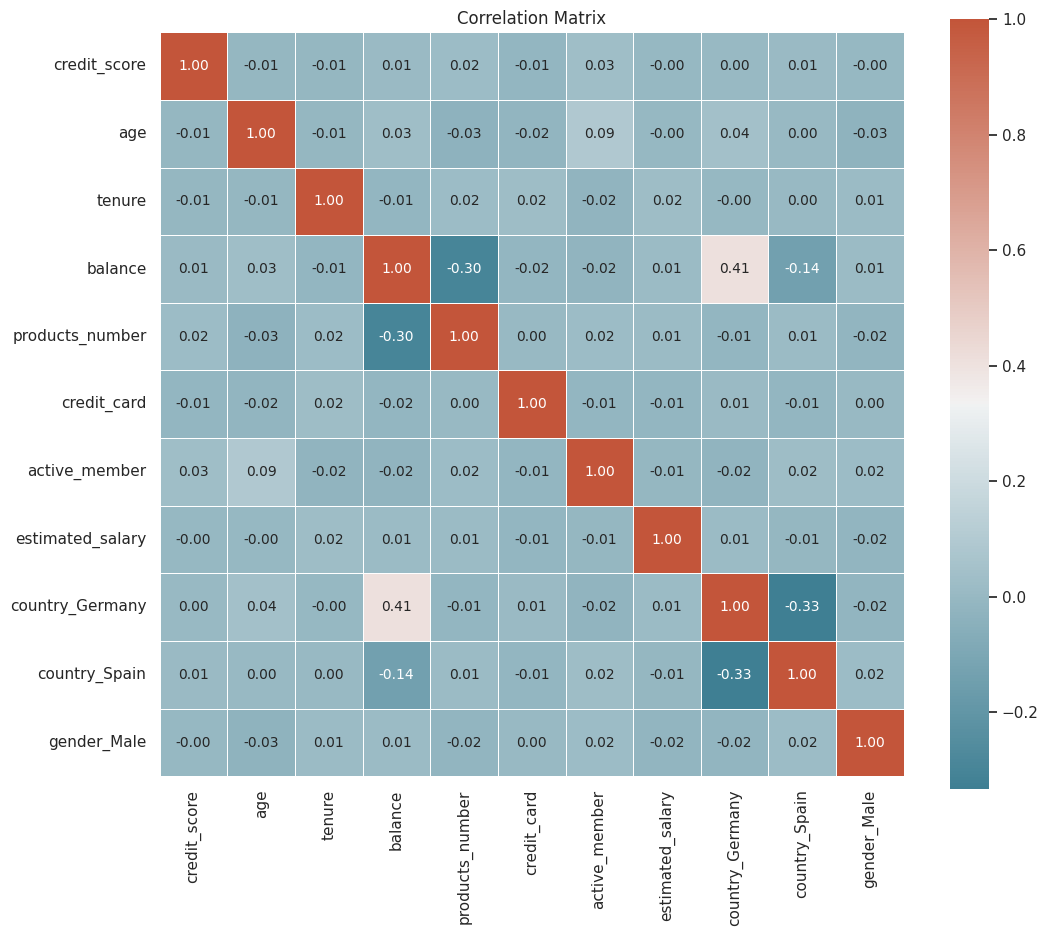

In [45]:
# Memeriksa koefisien korelasi untuk melihat variabel mana yang berkorelasi tinggi

plt.figure(figsize=(12, 10))
corr = X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", annot_kws={"size": 10}, square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [46]:
#Langkah 6: Mengimplementasikan Algoritma Naive Bayes


from sklearn.naive_bayes import GaussianNB

# Inisialisasi Pengklasifikasi Gaussian Naive Bayes
model = GaussianNB()

# Menyesuaikan model pada training data
model.fit(X_train, y_train)

# Memprediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
naive_bayes_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Gaussian Naive Bayes model:", naive_bayes_accuracy)

Accuracy of the Gaussian Naive Bayes model: 0.8335


In [48]:
# Membuat laporan klasifikasi
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.64      0.36      0.46       393

    accuracy                           0.83      2000
   macro avg       0.75      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000



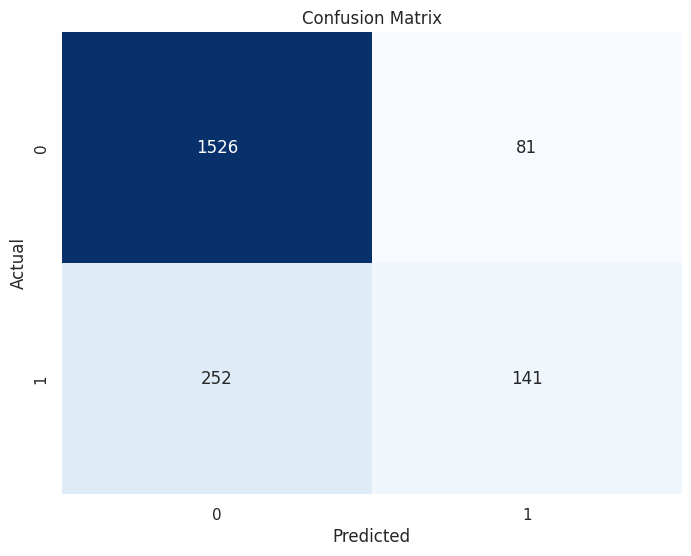

In [49]:
# Visualisasi confusion matriks
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [51]:
# For train data
model_accuracies_train = {
    'Naive Bayes': naive_bayes_accuracy
}

accuracy_data = pd.DataFrame(list(model_accuracies_train.items()), columns=['Model Name', 'Accuracy'])

accuracy_data = accuracy_data.sort_values(by='Accuracy', ascending=False)

accuracy_data

,Model Name,Accuracy
0,Naive Bayes,0.8335


In [1]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00


In [2]:
!wget -q -O - ipv4.icanhazip.com

34.138.198.38


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501